<a href="https://colab.research.google.com/gist/fernandoferreira-me/61e9e4a25060f95abbfdb8cb90aaaed9/question-rio-projeto-de-disciplina-de-text-mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Disciplina de Processamento de Linguagem Natural com Python

Bem-vindo ao projeto de disciplina de **Processamento de Linguagem Natural com Python**. Ao longo das últimas aulas vimos uma série de aplicações que nos deram a amplitude de possibilidades em trabalhar com textos. Para tal, usamos diversas bibliotecas, onde as que mais se destacaram foram NLTK, SPACY e GENSIM.

Esse notebook servirá de guia para a execução de uma análise de tópicos completa, usando o algoritmo de LDA e recursos para interpretação dos resultados. Utilizaremos notícias da seção "Mercado" extraídas da Folha de S. Paulo no ano de 2016.  Complete a análise com os códigos que achar pertinente e responda as questões presentes no Moodle. Boa sorte!

## O Notebook

Nesse notebook, você será guiado pela análise de **Extração de Tópicos**. As seguintes tarefas serão realizadas


1.   Download dos dados provenientes do kaggle 
2.   Seleção dos dados relevantes para a nossa análise
3.   Instalação das principais ferramentas e importação de módulos
4.   Pré-processamento usando NLTK
5.   Pré-processamento usando Spacy
6.   Análise de tópicos usando LDA
7.   Análise de NER usando Spacy
8.   Visualização dos tópicos usando tokens e entidades.



## Instruções para baixar os dados

Para baixar os dados será necessário o uso do gerenciador de downloads da Kaggle. A Kaggle, uma subsidiária do grupo Alphabet (Google), é uma comunidade on-line de cientistas de dados e profissionais de aprendizado de máquina.

Para utilizar o gerenciador, será necessário criar uma conta no site Kaggle.com.
Com a conta criada, obtenha um token de acesso, no formato kaggle.json

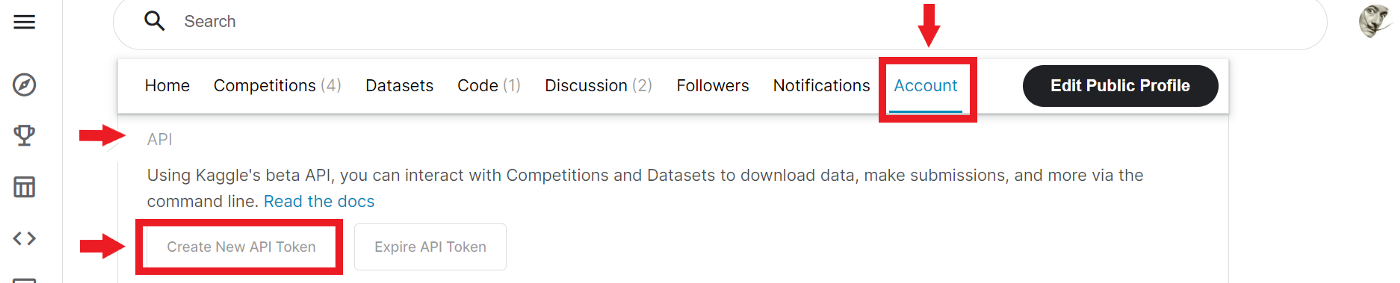

Em posse do token (baixe para seu computador), execute a células da próxima seção para acessar os dados de interesse e baixá-los.

# Baixe os dados

Instale o gerenciador kaggle no ambiente do Colab e faça o upload do arquivo kaggle.json 

In [1]:
# Instalar o pacote kaggle
!pip install kaggle

In [2]:
# Função para salvar o arquivo upload
from pathlib import Path
from IPython.display import display
from ipywidgets import FileUpload
import shutil

In [3]:
# Caminho do arquivo kaggle.json
source_path = Path(r"C:\Users\maria\OneDrive\Escritorio\INFNET\MACHINE LEARNING\Processamento Linguagem Natural Python\ProjetoDisciplina\kaggle.json")

In [4]:
# Caminho de destino (diretório .kaggle no diretório home)
destination_path = Path.home() / '.kaggle' / 'kaggle.json'
destination_path.parent.mkdir(parents=True, exist_ok=True)

In [5]:
# Copiar o arquivo para o diretório de destino
shutil.copy(source_path, destination_path)
print(f'Copied kaggle.json to {destination_path}')

# Configurar permissões do arquivo
import os
os.chmod(destination_path, 0o600)

Copied kaggle.json to C:\Users\maria\.kaggle\kaggle.json


Crie a pasta .kaggle

Baixe o dataset

In [6]:
!kaggle datasets download --force -d marlesson/news-of-the-site-folhauol

Dataset URL: https://www.kaggle.com/datasets/marlesson/news-of-the-site-folhauol
License(s): CC0-1.0




  0%|          | 0.00/187M [00:00<?, ?B/s]
  1%|          | 1.00M/187M [00:00<02:03, 1.58MB/s]
  1%|1         | 2.00M/187M [00:00<01:02, 3.11MB/s]
  2%|1         | 3.00M/187M [00:00<00:45, 4.27MB/s]
  3%|2         | 5.00M/187M [00:01<00:27, 6.89MB/s]
  3%|3         | 6.00M/187M [00:01<00:25, 7.55MB/s]
  4%|3         | 7.00M/187M [00:01<00:23, 8.02MB/s]
  4%|4         | 8.00M/187M [00:01<00:22, 8.51MB/s]
  5%|4         | 9.00M/187M [00:01<00:21, 8.79MB/s]
  5%|5         | 10.0M/187M [00:01<00:20, 9.01MB/s]
  6%|5         | 11.0M/187M [00:01<00:20, 9.15MB/s]
  6%|6         | 12.0M/187M [00:01<00:19, 9.48MB/s]
  7%|6         | 13.0M/187M [00:01<00:19, 9.46MB/s]
  7%|7         | 14.0M/187M [00:02<00:19, 9.43MB/s]
  8%|8         | 15.0M/187M [00:02<00:18, 9.63MB/s]
  9%|9         | 17.0M/187M [00:02<00:17, 10.4MB/s]
 10%|#         | 19.0M/187M [00:02<00:16, 10.9MB/s]
 11%|#1        | 21.0M/187M [00:02<00:15, 11.2MB/s]
 12%|#2        | 23.0M/187M [00:02<00:15, 11.4MB/s]
 13%|#3        | 25.

## Criar o DataFrame com os dados lidos diretamente da plataforma Kaggle

In [7]:
import pandas as pd
from tqdm.auto import tqdm
tqdm.pandas()


df = pd.read_csv("news-of-the-site-folhauol.zip")

# Atualizar o SPACY e  instalar os modelos pt_core_news_lg

In [8]:
# Atualizar spacy 
!pip install -U spacy
# instalar modelo pt_core_news_lg
!python -m spacy download pt_core_news_lg


     ---------------------------------------- 0.0/568.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/568.2 MB ? eta -:--:--
     -------------------------------------- 0.1/568.2 MB 825.8 kB/s eta 0:11:28
     ---------------------------------------- 0.2/568.2 MB 1.3 MB/s eta 0:07:12
     ---------------------------------------- 0.2/568.2 MB 1.3 MB/s eta 0:07:12
     ---------------------------------------- 0.3/568.2 MB 1.4 MB/s eta 0:06:55
     ---------------------------------------- 0.4/568.2 MB 1.7 MB/s eta 0:05:42
     ---------------------------------------- 0.6/568.2 MB 2.0 MB/s eta 0:04:48
     ---------------------------------------- 0.8/568.2 MB 2.3 MB/s eta 0:04:07
     ---------------------------------------- 1.0/568.2 MB 2.5 MB/s eta 0:03:43
     ---------------------------------------- 1.0/568.2 MB 2.5 MB/s eta 0:03:43
     ---------------------------------------- 1.2/568.2 MB 2.5 MB/s eta 0:03:44
     ---------------------------------------- 1.5/568.

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\maria\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\maria\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\maria\anaconda3\Lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
           ^^^^^^^^^^^^^^^^^^
  File "C:\Users\maria\anaconda3\Lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
                  ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\maria\anaconda3\Lib\http\client.py", line 473, in read
    s = self.fp.read(amt)
        ^^^^^^^^^^^^^^^^^
  File "C:\Users\maria\anaconda3\Lib\socket.py", line 706, in readinto
    return self._sock.recv_into(b)
           ^

In [9]:
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
from typing import Set

In [10]:
import pandas as pd
import numpy as np

print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)

Pandas version: 2.1.4
Numpy version: 1.26.4


## Instalando o PyDavis

In [11]:
!pip install pyldavis==3.2.2 wordcloud seaborn

## Instalar os datasets `stopwords`, `punkt` e `rslp` do nltk

In [12]:
import nltk # importa a biblioteca nltk para processamento de linguagem natural
from nltk.stem import RSLPStemmer # importa o stemmer RSLP do NLTK para realizar reducao de palavras
from nltk.tokenize import word_tokenize # importa o tokenizador de palavras NLTK

In [13]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

## Carregar os módulos usados ao longo desse notebook

In [14]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

from tqdm.auto import tqdm #importa barra de progresso TQDM para melhor visualizar 

import pyLDAvis
import pyLDAvis.sklearn
from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain # Importa a funcao chain para concatenar sequencias 

from typing import List, Set, Any

SEED = 123 # Define uma semente fixa para garantir a reprodutibilidade dos resultados


## Criar DataFrame com os dados lidos diretamente da plataforma Kaggle

In [15]:
# Le o arquivo CSV "news-of-the-site-folhauol.zip" e armazena os dados em um DataFrame "df"
df = pd.read_csv("news-of-the-site-folhauol.zip")

# Filtrando os dados para utilizar apenas as notícias do ano de 2016 e da categoria "Mercado"

Filtre os dados do DataFrame df e crie um DataFrame news_2016 que contenha apenas notícias de **2016** e da categoria **mercado**.

In [16]:
# Converte a coluna 'date' para o tipo datetime
df['date'] = pd.to_datetime(df.date)

# Filtra os dados para selecionar as noticias de 2016 e categoria 'mercado'
news_2016 = df[(df['date'].dt.year == 2016) & (df['category'] == 'mercado')]

## NLTK Tokenizer and Stemmer

Crie uma coluna no dataframe `news_2016` contendo os tokens para cada um dos textos. Os tokens devem estar representados pelo radical das palavras (stem). 
Para tal, complete o conteúdo da função `tokenize`.

In [17]:
from tqdm import tqdm

tqdm.pandas()

def tokenize(text: str) -> List[str]:
    """
    Function for tokenizing using `nltk.tokenize.word_tokenize`
    
    Returns:
      - A list of stemmed tokens (`nltk.stem.RSLPStemmer`)
      IMPORTANT: Only tokens with alphabetic
                 characters will be returned.
    """
    # Criacao de instancia do RSLPStemmer
    stemmer = RSLPStemmer()

    # Tokeniza o texto atraves da funcao word_tokenize
    tokens = word_tokenize(text)

    # Filtra os tokens para fazer inclusao apenas daqueles com carac alfabeticos
    filtered_tokens = [token for token in tokens if token.isalpha()]

    # Aplica o stemmer para cada token filtrado e retorna lista token stemizadas
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    return stemmed_tokens

# Adiciona a coluna 'nltk_tokens' ao DataFrame news_2016 aplicando a funcao tokenize em cada texto
news_2016.loc[:, 'nltk_tokens'] = news_2016.text.progress_map(tokenize)

100%|██████████| 7943/7943 [03:52<00:00, 34.15it/s]


## Criar umdocumento SPACY para cada texto do dataset

Crie uma coluna `spacy_doc` que contenha os objetos spacy para cada texto do dataset de interesse. Para tal, carregue os modelos `pt_core_news_lg` e aplique em todos os textos (pode demorar alguns minutos...)

In [18]:
# Carregar o modelo spacy para a lingua portuguesa (pt_core_news_lg)
nlp = spacy.load('pt_core_news_lg')

# Definir uma funcao chamada apply_spacy que recebe um texto como entrada
def apply_spacy(text):
    #Aplicar o modelo spacy ao texto recebido como entrada
    return nlp(text)

news_2016.loc[:, 'spacy_doc'] = news_2016['text'].progress_apply(apply_spacy)

100%|██████████| 7943/7943 [22:33<00:00,  5.87it/s]     


In [19]:
news_2016['spacy_doc'].head(1)
news_2016.head(1)

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro..."


## Realize a Lematização usando SPACY

O modelo NLP do spacy oferece a possiblidade de lematizar textos em português (o que não acontece com a biblioteca NLTK). Iremos criar uma lista de tokens
lematizados para cada texto do nosso dataset. Para tal, iremos retirar as 
stopwords, usando uma função que junta stopwords provenientes do NLTK e do Spacy. Essa lista completa, é retornada pela função stopwords (e você não precisa mexer).

Já a função filter retorna True caso o token seja composto por caracters alfabéticos, não estiver dentro da lista de stopwords e o lemma resultante não estiver contido na lista `o", "em", "em o", "em a" e "ano"`.

Crie uma coluna chamada `spacy_lemma` para armazenar o resultado desse pré-processamento.

In [20]:
import spacy.cli
spacy.cli.download("pt_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [21]:
import spacy
import nltk
from spacy.lang.pt.stop_words import STOP_WORDS
from typing import Set

# Baixar stopwords do NLTK, se ainda não foram baixadas
nltk.download('stopwords')

def stopwords() -> Set[str]:
    """
    Retorna a lista completa de stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

def filter_token(token: spacy.tokens.Token) -> bool:
    """
    Filtra stopwords e tokens indesejados
    """
    return token.is_alpha and not token.is_stop and token.lemma_ not in ['o', 'em', 'em o', 'em a', 'ano']

def lemma(doc: spacy.tokens.Doc) -> str:
    """
    Realiza a lematização dos tokens filtrados
    """
    return ' '.join([token.lemma_ for token in doc if filter_token(token)])

# Baixar o modelo do spaCy para português, se ainda não foi baixado
import spacy.cli
spacy.cli.download("pt_core_news_sm")

# Carregar o modelo do spaCy para português
nlp = spacy.load('pt_core_news_sm')

# Aplicar a função lemma a cada documento na coluna 'spacy_doc' do dataframe news_2016
# O resultado é atribuído à nova coluna 'spacy_lemma'

news_2016['spacy_doc'] = news_2016['text_column'].apply(nlp)  # Certifique-se de substituir 'text_column' pelo nome da coluna que contém os textos
news_2016['spacy_lemma'] = news_2016['spacy_doc'].progress_apply(lemma)

# Verificar o resultado
print(news_2016[['text_column', 'spacy_lemma']])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


KeyError: 'text_column'

In [22]:
def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

def filter(w: spacy.lang.pt.Portuguese) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    # Verificar se o token e alfabetico, nao e uma stopword e nao esta na lista de tokens indesejados
    return w.is_alpha and not w.is_stop and w.lemma_ not in ['o', 'em', 'em o', 'em a', 'ano', 'oi', 'btg', 'ser', 'ter']
    #return not w.lemma_.isalpha() or w.lemma_.lower().strip() in complete_stopwords or w.lemma_.lower().strip() in ['o', 'em', 'em o', 'em a', 'ano', 'oi', 'btg', 'ser', 'ter']

# Aplicar a funcao lemma a cada documento na coluna 'spacy_doc' do dataframe news_2016
# O resultado e atribuido a nova coluna 'spacy_lemma'

news_2016.loc[:, 'spacy_lemma'] = news_2016.spacy_doc.progress_map(lemma)

100%|██████████| 7943/7943 [00:02<00:00, 2785.90it/s]


In [23]:
# Carregar o modelo spaCy para a língua portuguesa
nlp = spacy.load('pt_core_news_lg')

# Definir uma função chamada apply_spacy que recebe um texto como entrada
def apply_spacy(text):
    # Aplicar o modelo spaCy ao texto recebido como entrada
    return nlp(text)

# Criar a coluna 'spacy_doc' no DataFrame news_2016
news_2016.loc[:, 'spacy_doc'] = news_2016['text'].progress_apply(apply_spacy)


100%|██████████| 7943/7943 [17:18<00:00,  7.65it/s]


In [24]:
import nltk
from tqdm import tqdm
tqdm.pandas()

# Baixar as stopwords do NLTK
nltk.download('stopwords')

def stopwords() -> Set:
    """
    Return complete list of stopwords
    """
    return set(list(nltk.corpus.stopwords.words("portuguese")) + list(STOP_WORDS))

complete_stopwords = stopwords()

def filter_token(token: spacy.tokens.Token) -> bool:
    """
    Filter stopwords and undesired tokens
    """
    # Verificar se o token é alfabético, não é uma stopword e não está na lista de tokens indesejados
    return token.is_alpha and not token.is_stop and token.lemma_ not in ['o', 'em', 'em o', 'em a', 'ano', 'oi', 'btg', 'ser', 'ter']

def lemma(doc):
    """
    Lemmatize the document
    """
    return [token.lemma_ for token in doc if filter_token(token)]

# Aplicar a função lemma a cada documento na coluna 'spacy_doc' do DataFrame news_2016
# O resultado é atribuído à nova coluna 'spacy_lemma'
news_2016.loc[:, 'spacy_lemma'] = news_2016['spacy_doc'].progress_apply(lemma)

# Verificar as primeiras linhas para garantir que a coluna foi criada corretamente
print(news_2016.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████| 7943/7943 [00:03<00:00, 2442.80it/s]

                                                   title  \
34207  Fazendeira cria própria rede de banda larga e ...   
34238  Alteração na cobrança do ICMS eleva conta de c...   
34245  Ajustes sobre servidores públicos emperram nos...   
34248  Inventor da internet das coisas ataca mitos so...   
34249  Livro analisa empresas de crescimento exponenc...   

                                                    text       date category  \
34207  "Sou apenas a mulher de um fazendeiro", diz Ch... 2016-12-31  mercado   
34238  A conta do celular pós-pago ou controle ficará... 2016-12-31  mercado   
34245  A maior parte dos projetos de ajuste das conta... 2016-12-31  mercado   
34248  Desde as primeiras décadas do século 19 se diz... 2016-12-31  mercado   
34249  O Cifras & Letras seleciona semanalmente lança... 2016-12-31  mercado   

      subcategory                                               link  \
34207         NaN  http://www1.folha.uol.com.br/mercado/2016/12/1...   
34238         

## Reconhecimento de entidades nomeadas

Crie uma coluna `spacy_ner` que armazene todas as organizações (APENAS organizações) que estão contidas no texto.

In [25]:
def NER(doc: spacy.tokens.Doc):
    """
    Return the list of organizations for a SPACY document
    """
    organizations = []
    for ent in doc.ents:
        if ent.label_ == 'ORG':
            organizations.append(ent.text)
    return organizations

#Aplica a funcao NER em cada objeto spacy_doc dos textos da coluna 'text' do df

news_2016.loc[:, 'spacy_ner'] = news_2016.spacy_doc.progress_map(NER)

100%|██████████| 7943/7943 [00:00<00:00, 12795.30it/s]


In [26]:
news_2016.head(2)

,title,text,date,category,subcategory,link,nltk_tokens,spacy_doc,spacy_lemma,spacy_ner
34207,Fazendeira cria própria rede de banda larga e ...,"""Sou apenas a mulher de um fazendeiro"", diz Ch...",2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[sou, apen, a, mulh, de, um, fazend, diz, chri...","("", Sou, apenas, a, mulher, de, um, fazendeiro...","[mulher, fazendeiro, Christine, Conder, modést...","[Ofcom, Cavamos, LEMA, Membro, Ordem do Impéri..."
34238,Alteração na cobrança do ICMS eleva conta de c...,A conta do celular pós-pago ou controle ficará...,2016-12-31,mercado,NaN,http://www1.folha.uol.com.br/mercado/2016/12/1...,"[a, cont, do, celul, ou, control, fic, mais, c...","(A, conta, do, celular, pós-pago, ou, controle...","[conta, celular, controle, ficar, cara, decisã...","[Oi, TIM, Claro, Vivo, GERCINA, FERNANDA BRIGA..."


## Bag-of-Words

Crie uma coluna `tfidf` no dataframe `news_2016`. Use a coluna `spacy_lemma` como base para cálculo do TFIDF. 
O número máximo de features que iremos considerar é 5000. E o token, tem que ter aparecido pelo menos 10 vezes (`min_df`) nos documentos. 

In [27]:
from typing import List
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm

tqdm.pandas()

class Vectorizer:
    def __init__(self, doc_tokens: List[List[str]]):
        self.doc_tokens = doc_tokens
        self.tfidf = TfidfVectorizer()
        self.tfidf_matrix = None # Atributo adicionado 

    def vectorizer(self):
        """
        Convert a list of tokens to tfidf vector
        Returns the tfidf vector and attribute it to self.tfidf
        """
        doc_strings = [' '.join(tokens) for tokens in self.doc_tokens]  # Conversao de tokens para strings
        self.tfidf_matrix = self.tfidf.fit_transform(doc_strings)  # Aplicacao da vetorizacao tfidf
        return self.tfidf_matrix
        
    def __call__(self):
        if self.tfidf_matrix is None:
            self.vectorizer()
        return self.tfidf

doc_tokens = news_2016.spacy_lemma.values.tolist()
vectorizer = Vectorizer(doc_tokens)
tfidf_matrix = vectorizer.vectorizer()  # Chame o método vectorizer para inicializar e treinar o modelo

def tokens2tfidf(tokens):
    tokens = ' '.join(tokens)
    array = vectorizer().transform([tokens]).toarray()[0]
    return array

# Aplica a funcao tokens2tfidf em cada linha do DataFrame
news_2016.loc[:, 'tfidf'] = news_2016.spacy_lemma.progress_map(tokens2tfidf)


100%|██████████| 7943/7943 [00:25<00:00, 307.26it/s]


## Extração de Tópicos

Realize a extração de 9 tópicos usando a implementação do sklearn do algoritmo Latent Dirichlet Allocation. Como parâmetros, você irá usar o número máximo de iterações igual à 100 (pode demorar) e o `random_seed` igual a `SEED` que foi setado no início do notebook

In [28]:
N_TOKENS = 9

corpus = np.array(news_2016.tfidf.tolist())

lda = LDA(n_components=N_TOKENS, max_iter=100, random_state=123)

lda.fit(tfidf_matrix)

LatentDirichletAllocation(max_iter=100, n_components=9, random_state=123)

In [29]:
vectorizer()

TfidfVectorizer()

### Visualize os tópicos usando a ferramenta pyLDAVis

In [30]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import pyLDAvis
import pyLDAvis.sklearn

# Dados de exemplo (substitua pelos seus dados)
doc_tokens = ["example text data", "another set of text data", "more text data for lda"]

# Vetorização
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(doc_tokens)

# Ajuste do modelo LDA
n_topics = 9
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(tfidf_matrix)

# Preparando os dados para PyLDAvis
doc_lengths = [len(doc) for doc in doc_tokens]
vocab = tfidf_vectorizer.get_feature_names_out()
term_frequency = tfidf_matrix.sum(axis=0).tolist()[0]
doc_topic_dists = lda.transform(tfidf_matrix)
topic_term_dists = lda.components_ / lda.components_.sum(axis=1)[:, None]

# Substituindo a função problemática
def custom_topic_info(topic_term_dists, topic_proportion, term_frequency, term_topic_freq, vocab, lambda_step, R, n_jobs, start_index):
    result = pd.DataFrame({
        'saliency': np.random.rand(len(vocab)),  # Esta é uma solução temporária; substitua com seu cálculo real de saliência
        'Term': vocab,
        'Freq': term_frequency,
        'Total': term_frequency,
        'Category': 'Default'
    })
    result = result.sort_values(by='saliency', ascending=False).head(R).drop(columns='saliency')
    return result

original_topic_info = pyLDAvis._prepare._topic_info
pyLDAvis._prepare._topic_info = custom_topic_info

# Preparando a visualizacao com PyLDAvis
panel = pyLDAvis.prepare(topic_term_dists, doc_topic_dists, doc_lengths, vocab, term_frequency)


In [31]:
# Habilitando a visualização no notebook
pyLDAvis.enable_notebook()

# Exibindo o painel
pyLDAvis.display(panel)

# Restaurando a função original
pyLDAvis._prepare._topic_info = original_topic_info


In [32]:
import pyLDAvis

pyLDAvis.save_html(panel, 'lda_visualization.html')


In [34]:
from IPython.display import IFrame

# Salvar o painel como um arquivo HTML
pyLDAvis.save_html(panel, 'lda_visualization.html')

# Exibir o arquivo HTML no Jupyter Notebook
IFrame('lda_visualization.html', width=800, height=600)


### Atribua a cada text, um (e apenas um) tópic. 

Crie uma coluna `topic` onde o valor é exatamente o tópico que melhor caracteriza o documento de acordo com o algoritmo de LDA.

In [35]:
from sklearn.decomposition import LatentDirichletAllocation

# Assumindo que 'tfidf_matrix' é a matriz TF-IDF completa
tfidf_matrix = np.array(news_2016['tfidf'].tolist())

# Treinar novamente o modelo LDA com a matriz TF-IDF atual
n_topics = 9  # Número de tópicos desejados, ajustável conforme necessário
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(tfidf_matrix)

def get_topic(tfidf):
    """
    Get topic for a LDA trained model
    """
    tfidf_2d = tfidf.reshape(1, -1)
    topic_probabilities = lda.transform(tfidf_2d)
    best_topic = np.argmax(topic_probabilities)
    return best_topic

# Aplicando a função get_topic em cada linha da coluna tfidf
news_2016['topic'] = news_2016['tfidf'].progress_apply(get_topic)



100%|██████████| 7943/7943 [00:09<00:00, 850.30it/s]


In [36]:
def get_topic_names(lda_model, feature_names, n_top_words):
    # Retorna uma lista de nomes de tópicos com base nas principais palavras de cada tópico
    topic_names = []
    for topic_idx, topic in enumerate(lda_model.components_):
        # Obtém as palavras principais de cada tópico com base nos índices de ordenação
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_names.append(''.join(top_words))
    return topic_names

# Obtém os nomes das características (palavras) do vetorizador
feature_names = vectorizer.get_feature_names_out()  # Certifique-se de que vectorizer é uma instância de TfidfVectorizer

# Obtém os nomes dos tópicos
n_top_words = 1  # Número de palavras a serem usadas para cada nome do tópico
topic_names = get_topic_names(lda, feature_names, n_top_words)

# Cria mapeamento de número de tópico para nome de tópico
topic_mapping = {i: name for i, name in enumerate(topic_names)}

# Aplica o mapeamento à coluna 'topic' do DataFrame
news_2016['topic_name'] = news_2016['topic'].map(topic_mapping)

print(news_2016.head())


AttributeError: 'Vectorizer' object has no attribute 'get_feature_names_out'

In [37]:
print(news_2016.head(2))

                                                   title  \
34207  Fazendeira cria própria rede de banda larga e ...   
34238  Alteração na cobrança do ICMS eleva conta de c...   

                                                    text       date category  \
34207  "Sou apenas a mulher de um fazendeiro", diz Ch... 2016-12-31  mercado   
34238  A conta do celular pós-pago ou controle ficará... 2016-12-31  mercado   

      subcategory                                               link  \
34207         NaN  http://www1.folha.uol.com.br/mercado/2016/12/1...   
34238         NaN  http://www1.folha.uol.com.br/mercado/2016/12/1...   

                                             nltk_tokens  \
34207  [sou, apen, a, mulh, de, um, fazend, diz, chri...   
34238  [a, cont, do, celul, ou, control, fic, mais, c...   

                                               spacy_doc  \
34207  (", Sou, apenas, a, mulher, de, um, fazendeiro...   
34238  (A, conta, do, celular, pós-pago, ou, controle...   


## Número de documentos vs tópicos 

Esse gráfico nos mostra quantos documentos foram caracterizados por cada tópico.

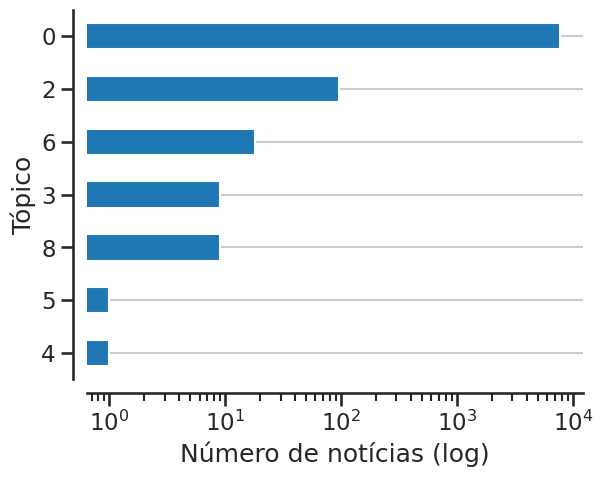

In [38]:
with sns.axes_style("ticks"):
    sns.set_context("talk")
    ax = news_2016['topic'].value_counts().sort_values().plot(kind = 'barh')
    ax.yaxis.grid(True)
    ax.set_ylabel("Tópico")
    ax.set_xlabel("Número de notícias (log)")
    sns.despine(offset = 10)
    ax.set_xscale("log")

## Crie uma nuvem de palavra para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa. 

In [39]:
import pandas as pd

# Verificar se a coluna 'spacy_lemma' existe
if 'spacy_lemma' not in news_2016.columns:
    print("A coluna 'spacy_lemma' não existe no DataFrame. Certifique-se de que a coluna está presente.")
else:
    print("A coluna 'spacy_lemma' existe no DataFrame.")


A coluna 'spacy_lemma' existe no DataFrame.


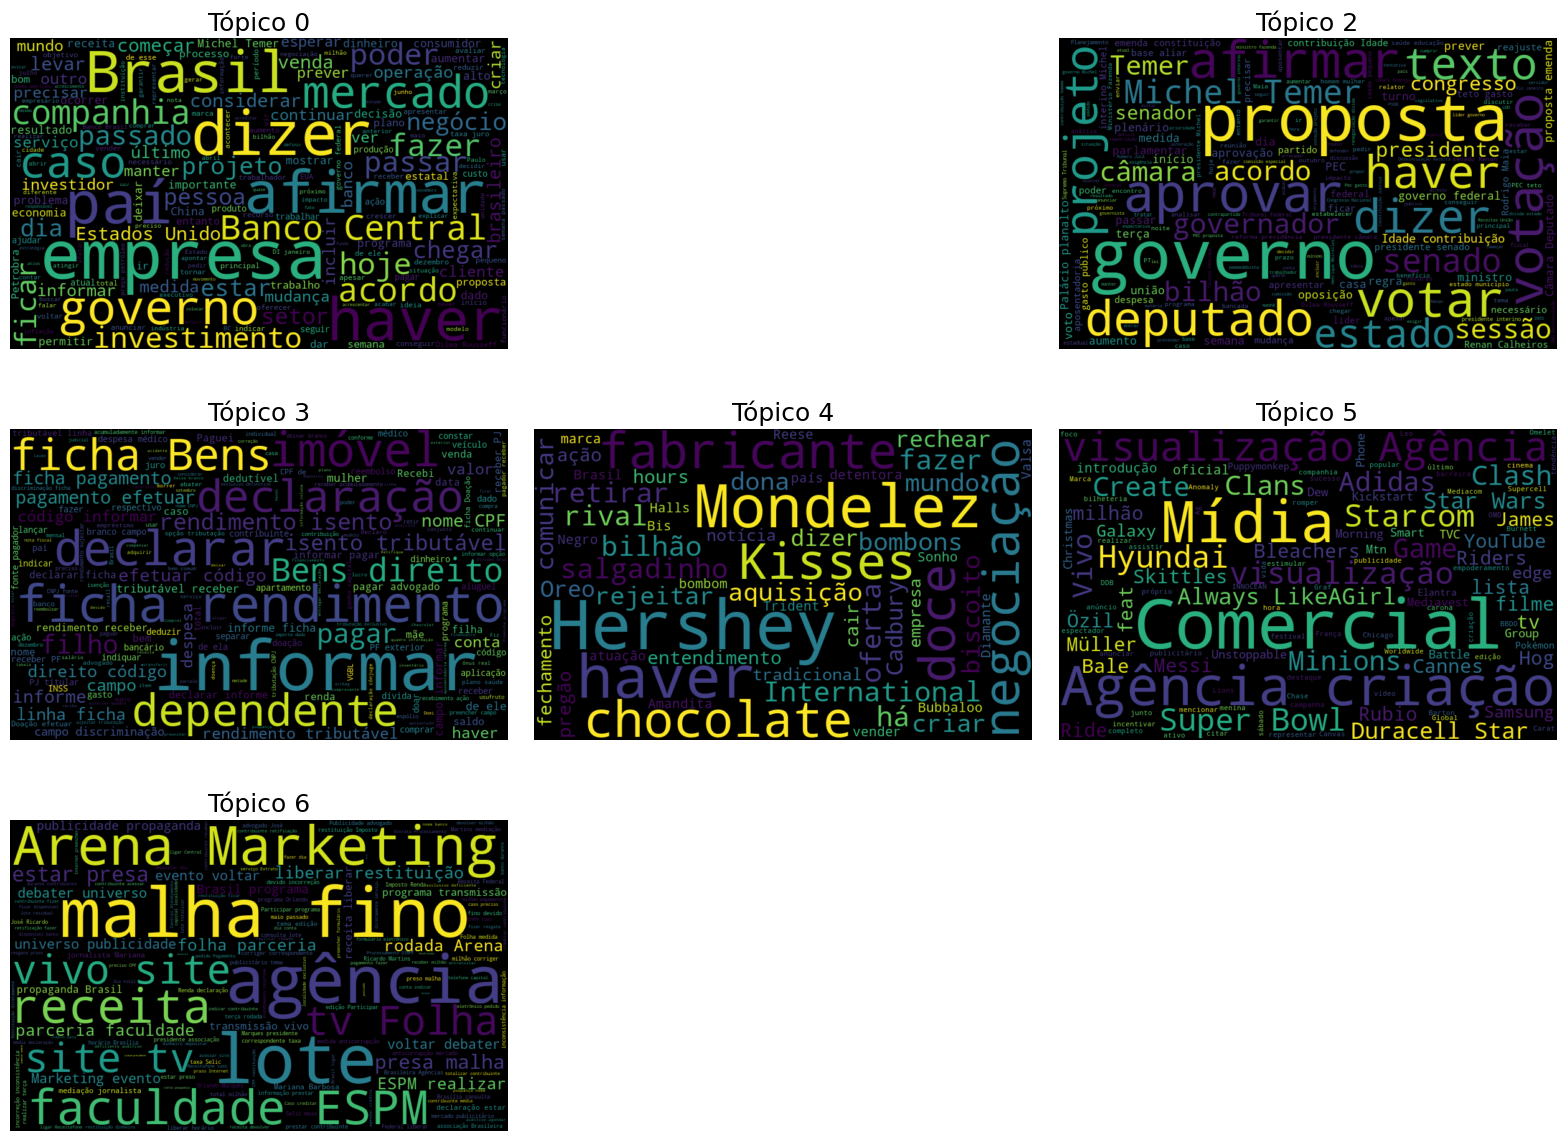

In [40]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from itertools import chain

def plot_wordcloud(text: str, ax: plt.Axes) -> plt.Axes:
    """
    Plot the wordcloud for the text.
    Arguments:
        - text: string to be analyzed
        - ax: plt subaxis
    Returns:
     - ax
    """
    # Criar wordcloud
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)

    # Plotar o wordcloud
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    return ax

def plot_wordcloud_for_a_topic(topic: int, ax: plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_words = list(chain(*topic_news['spacy_lemma'].values.tolist()))
    string_complete = ' '.join(list_of_words)
    if not string_complete:
        return None
    return plot_wordcloud(string_complete, ax)

# Certifique-se de que o número de tópicos corresponde ao número no modelo LDA
n_topics = news_2016['topic'].nunique()

# Criar a figura para plotar as nuvens de palavras
fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_ = axis.flatten()
for idx, ax in enumerate(axis_):
    if idx < n_topics:
        ax_ = plot_wordcloud_for_a_topic(idx, ax)
        if ax_ is None:
            plt.delaxes(ax)
            continue
        ax.set_title(f"Tópico {idx}")
    else:
        plt.delaxes(ax)
fig.tight_layout()
plt.show()


## Crie uma nuvem de entidades para cada tópico.

Use as colunas `spacy_lemma` e  `topic` para essa tarefa. 

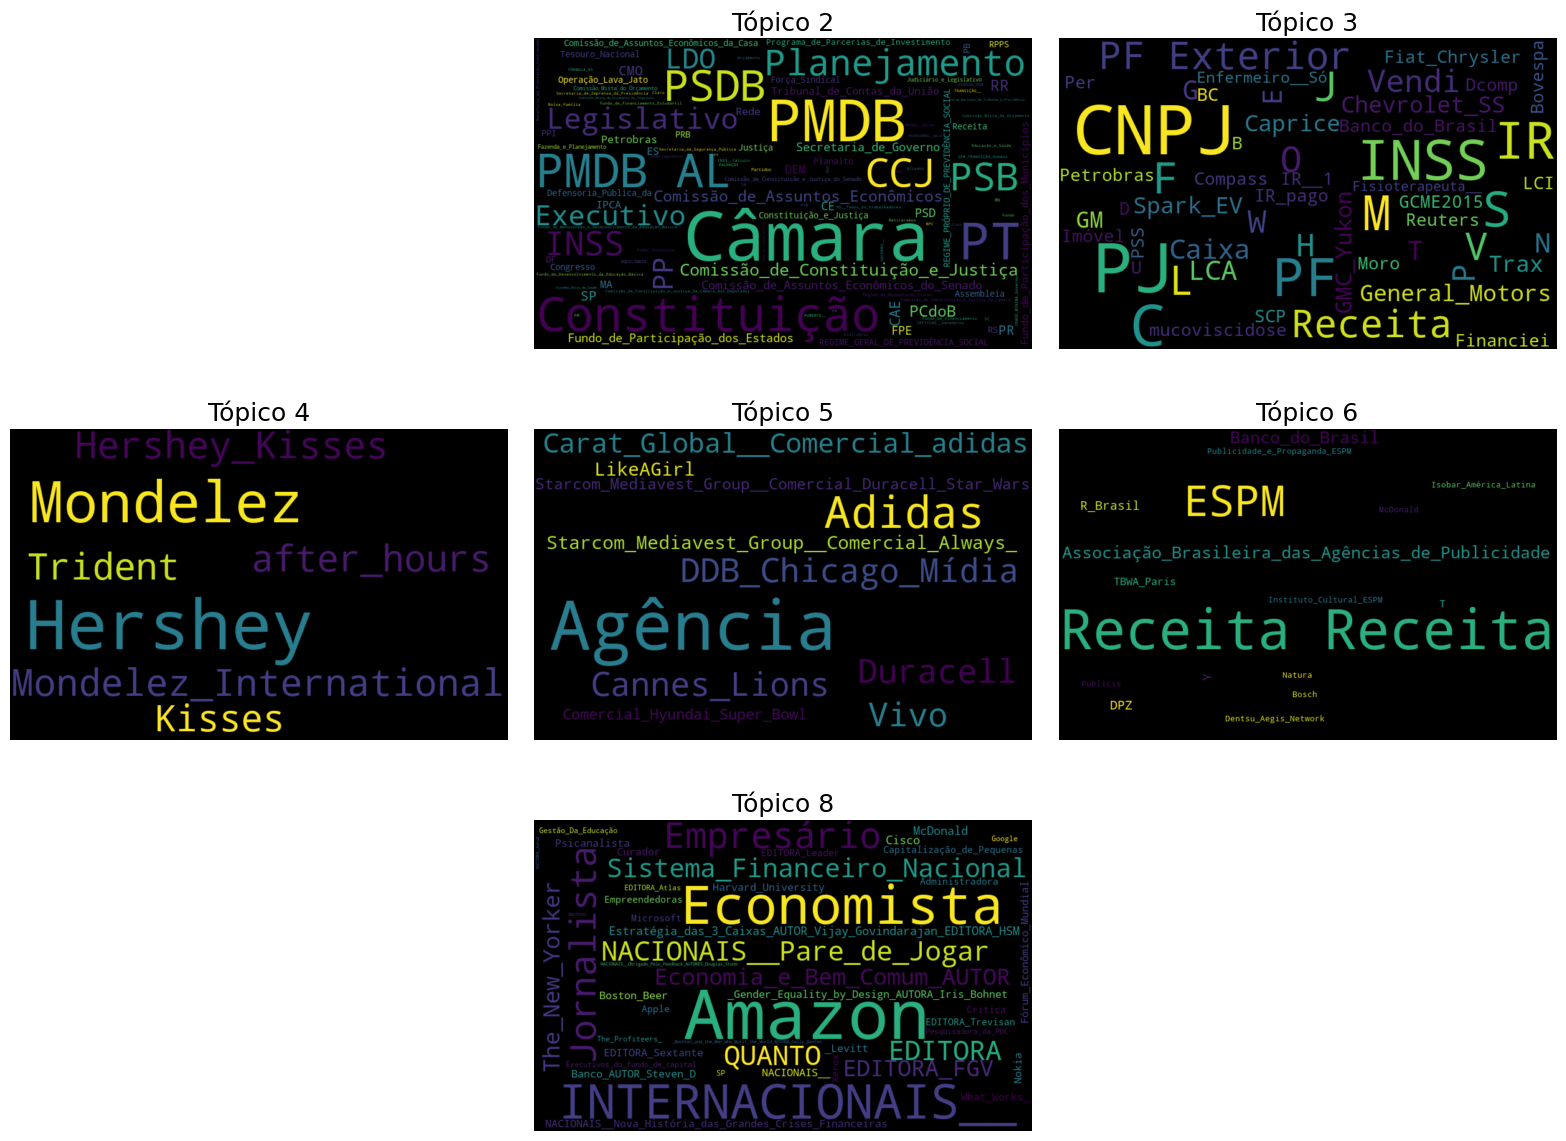

In [41]:
def plot_wordcloud_entities_for_a_topic(topic:int, ax:plt.Axes) -> plt.Axes:
    topic_news = news_2016[news_2016['topic'] == topic]
    list_of_docs = topic_news.spacy_ner.apply(lambda l : [w.replace(" ", "_") for w in l])
    list_of_words = chain(*list_of_docs)
    string_complete = ' '.join(list_of_words)
    if not len(string_complete):
        return None
    return plot_wordcloud(string_complete, ax)

fig, axis = plt.subplots(3, 3, figsize=(16, 12))

axis_  = axis.flatten()
for idx, ax in enumerate(axis_):
    ax_ = plot_wordcloud_entities_for_a_topic(idx + 1, ax)
    if ax_ is None:
        plt.delaxes(ax)
        continue
    ax.set_title(f"Tópico {idx + 1}")
fig.tight_layout()